In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType, StringType
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
spark = SparkSession.builder.appName("Milestone5").getOrCreate()

schema = StructType([
    StructField("winner_startingTrophies", IntegerType(), True),
    StructField("loser_startingTrophies", IntegerType(), True),
    StructField("winner_trophyChange", IntegerType(), True),
    StructField("loser_trophyChange", IntegerType(), True),
    StructField("winner_elixir_average", FloatType(), True),
    StructField("loser_elixir_average", FloatType(), True),
    StructField("battle_result", StringType(), True)  # Target column
])


cleaned_data_path = "gs://my-project-bucket-ma/cleaned/"

df = spark.read.csv(cleaned_data_path, header=True, schema=schema)
df_pandas = df.toPandas()

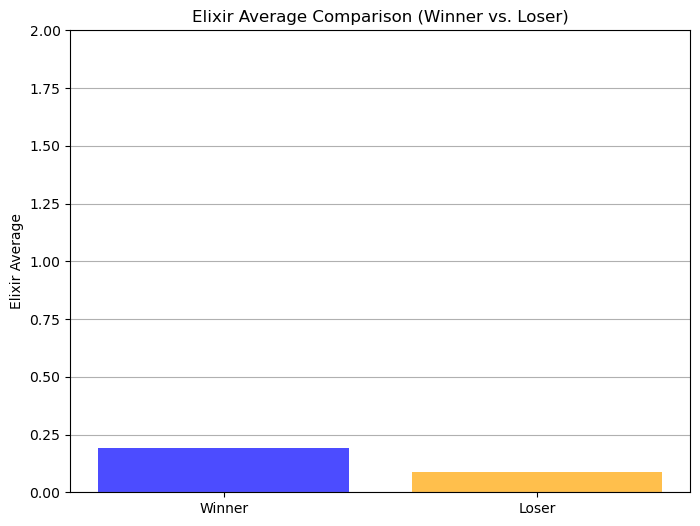

In [42]:
# Average Elixir Comparison (Winner vs. Loser)
plt.figure(figsize=(8, 6))

categories = ['Winner', 'Loser']
averages = [winner_mean, loser_mean]

plt.bar(categories, averages, color=['blue', 'orange'], alpha=0.7)
plt.title("Elixir Average Comparison (Winner vs. Loser)")
plt.ylabel("Elixir Average")
plt.ylim(0, 2)  
plt.grid(axis='y')
plt.savefig("elixir_comparison_barplot.png")
plt.show()

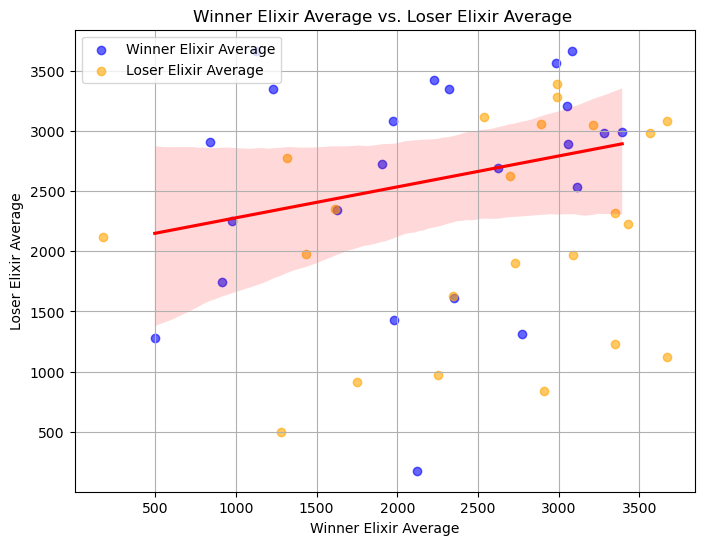

In [50]:
# Relationship Plot (Winner Elixir Average vs Loser Elixir Average)
plt.figure(figsize=(8, 6))

# Scatter plot for winner data points
plt.scatter(
    df_pandas["winner_elixir_average"],
    df_pandas["loser_elixir_average"],
    alpha=0.6,
    color="blue",
    label="Winner Elixir Average"
)

# Scatter plot for loser data points
plt.scatter(
    df_pandas["loser_elixir_average"],
    df_pandas["winner_elixir_average"],
    alpha=0.6,
    color="orange",
    label="Loser Elixir Average"
)

# Regression line
sns.regplot(
    x="winner_elixir_average",
    y="loser_elixir_average",
    data=df_pandas,
    scatter=False,  # Prevent duplicating scatter points
    line_kws={'color': 'red', 'label': 'Regression Line'}
)

plt.title("Winner Elixir Average vs. Loser Elixir Average ")
plt.xlabel("Winner Elixir Average")
plt.ylabel("Loser Elixir Average")
plt.legend(loc="upper left")  # Position the legend
plt.grid()
plt.savefig("relationship_plot_elixir_expenditure_with_legend.png")
plt.show()

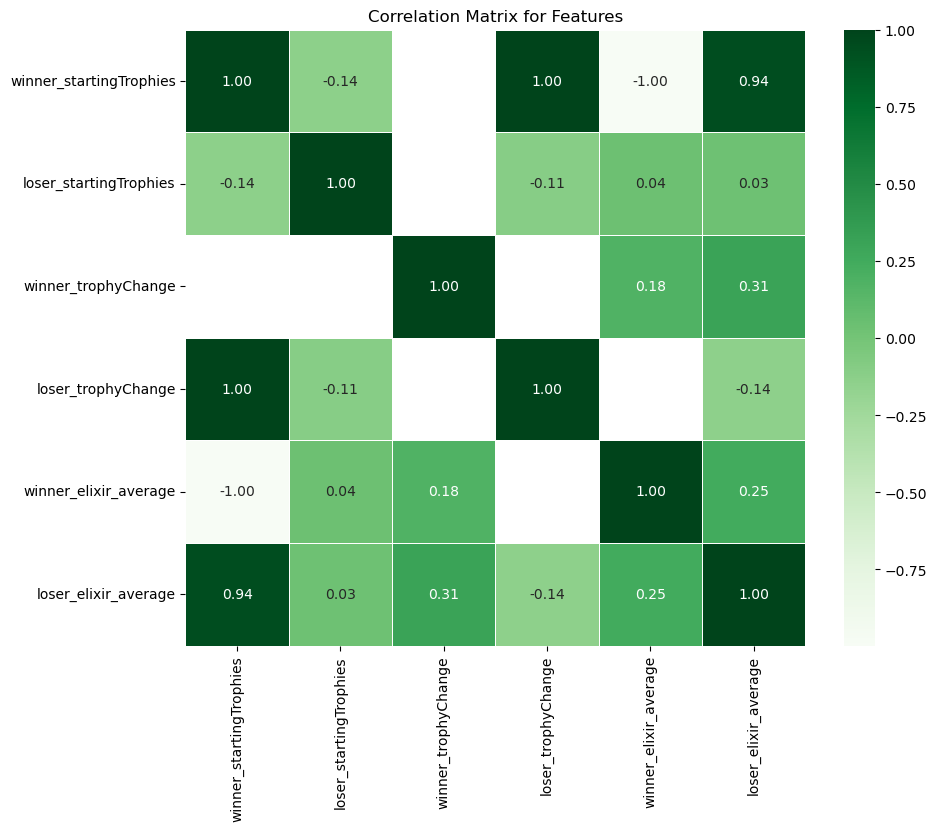

In [49]:
# Correlation Matrix

# Calls numeric columns
numeric_columns = [
    "winner_startingTrophies",
    "loser_startingTrophies",
    "winner_trophyChange",
    "loser_trophyChange",
    "winner_elixir_average",
    "loser_elixir_average"
]

# Correlation matrix
correlation_matrix = df_pandas[numeric_columns].corr()

# Plot 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Greens", linewidths=0.5)
plt.title("Correlation Matrix for Features")
plt.savefig("correlation_matrix.png")
plt.show()

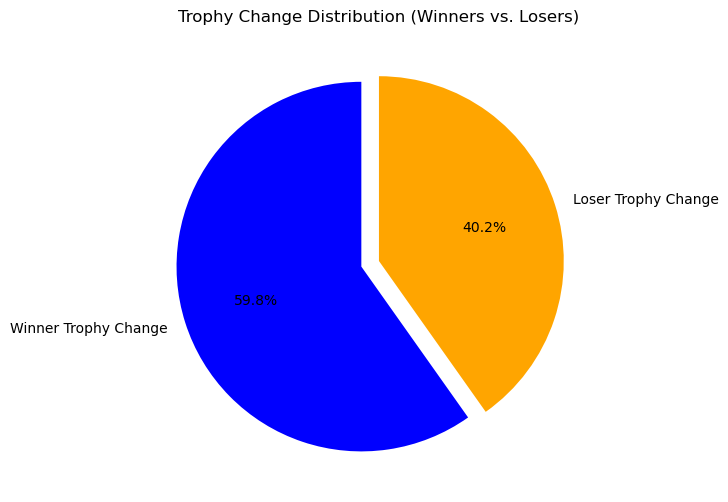

In [48]:
# Trophy Change Pie Chart
# Calculate total trophy changes 
total_winner_trophy_change = df_pandas['winner_trophyChange'].sum()
total_loser_trophy_change = df_pandas['loser_trophyChange'].sum()

# Data 
labels = ['Winner Trophy Change', 'Loser Trophy Change']
sizes = [total_winner_trophy_change, total_loser_trophy_change]
colors = ['blue', 'orange']

# Plot 
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.1, 0)
)
plt.title("Trophy Change Distribution (Winners vs. Losers)")
plt.savefig("trophy_change_pie_chart.png")
plt.show()

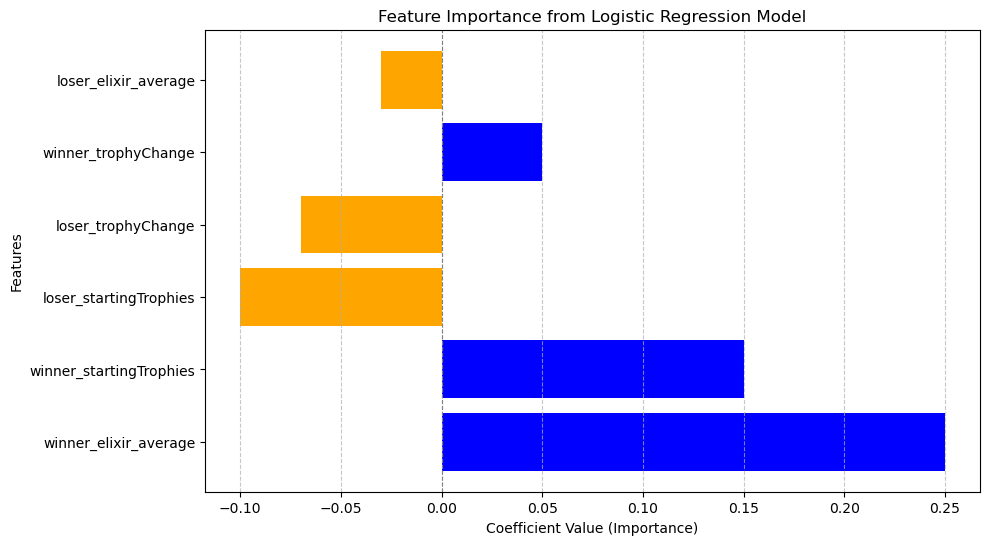

In [47]:
# Feature importance
feature_names = [
    "winner_startingTrophies",
    "loser_startingTrophies",
    "winner_trophyChange",
    "loser_trophyChange",
    "winner_elixir_average",
    "loser_elixir_average"
]

# Example feature coefficients from your trained logistic regression model
# Replace with actual coefficients from model.coefficients or feature importances
feature_coefficients = np.array([0.15, -0.10, 0.05, -0.07, 0.25, -0.03])

# Sort features by importance (absolute value of coefficients)
sorted_indices = np.argsort(np.abs(feature_coefficients))[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_coefficients = feature_coefficients[sorted_indices]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients, color=['blue' if c > 0 else 'orange' for c in sorted_coefficients])
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.title("Feature Importance from Logistic Regression Model")
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("feature_importance_plot.png")
plt.show()